In [33]:
!git clone https://github.com/jmsaavedrar/machine_learning
import sys
sys.path.append('/content/machine_learning')
import numpy as np
import nn.perceptron as perceptron
import sklearn.datasets as datasets
import metrics.metrics as metrics
import matplotlib.pyplot as plt
iris = datasets.load_iris()
X = iris.data[:100,1:3]
y = iris.target[:100:]

n = X.shape[0]
n_test = int(np.rint(0.2 * n))

# random sort
idx = np.random.permutation(n)
X = X[idx]
y = y[idx]

X_train = X[:-n_test]
X_test = X[-n_test:]
y_train = y[:-n_test]
y_test = y[-n_test:]

""" data normalization, improve convergence """
mu = np.mean(X_train, axis = 0)
dst = np.std(X_train, axis = 0)
X_train = (X_train - mu) / dst
X_test = (X_test - mu) / dst
print('train: {}'.format(X_train.shape))
print('val: {}'.format(X_test.shape))

fatal: destination path 'machine_learning' already exists and is not an empty directory.
train: (80, 2)
val: (20, 2)


In [30]:
"""-------------------------------------------"""
#Logistic Regression
model = perceptron.Perceptron()
model.setLoss('mse')
model.setSteps(50)
model.setPrintSteps(1)


coeff = model.fit(X_train, y_train)
#Evaluation (accuracy x clase)
y_pred =model.predict(X_test)


acc= metrics.accuracy(np.expand_dims(y_test, axis = 1) , y_pred)
print('Acc Test {}'.format(acc))



it 0 mse loss_bce 0.6825935573375854 loss_mse 0.24472370782699765
it 0 acc 0.95
it 1 mse loss_bce 0.6737433881012265 loss_mse 0.2403004037490514
it 1 acc 1.0
it 2 mse loss_bce 0.6650732370696868 loss_mse 0.23596923932320904
it 2 acc 1.0
it 3 mse loss_bce 0.6565809150771771 loss_mse 0.23172986974033236
it 3 acc 1.0
it 4 mse loss_bce 0.6482640718461731 loss_mse 0.22758178237736434
it 4 acc 1.0
it 5 mse loss_bce 0.6401202130022332 loss_mse 0.22352430978881474
it 5 acc 1.0
it 6 mse loss_bce 0.6321467166369652 loss_mse 0.21955664269188713
it 6 acc 1.0
it 7 mse loss_bce 0.6243408493168027 loss_mse 0.21567784281614294
it 7 acc 1.0
it 8 mse loss_bce 0.6166997814526839 loss_mse 0.21188685550483335
it 8 acc 1.0
it 9 mse loss_bce 0.609220601962445 loss_mse 0.20818252197127354
it 9 acc 1.0
it 10 mse loss_bce 0.6019003321735459 loss_mse 0.20456359112950567
it 10 acc 1.0
it 11 mse loss_bce 0.594735938928375 loss_mse 0.2010287309336906
it 11 acc 1.0
it 12 mse loss_bce 0.587724346867754 loss_mse 0.197

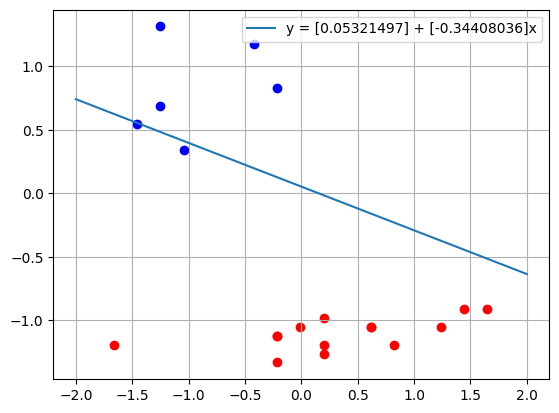

In [31]:
#--- view
plt.scatter(X_test[y_test==0][:,0], X_test[y_test==0][:,1], color = 'red')
plt.scatter(X_test[y_test==1][:,0], X_test[y_test==1][:,1], color = 'blue')
x = np.linspace(-2, 2, 400)
y = coeff[0] + coeff[1]*x
plt.plot(x, y, label = f'y = {coeff[0]} + {coeff[1]}x')
plt.grid(True)
plt.legend()
plt.show()